# Изучение критерия Филлибена, и его реализация в среде программирования Python


#### Описание гипотезы и критерия

Филлибен предложил критерий для проверки сложной гипотезы нормальности (когда параметры распределения не определены), статистикой которого является коэффициент корреляции r между порядковыми статистиками эмпирического ряда наблюдений x_i и медианами порядковых статистик стандартного нормального распределения (M_i)


#### Алгоритм вычисления
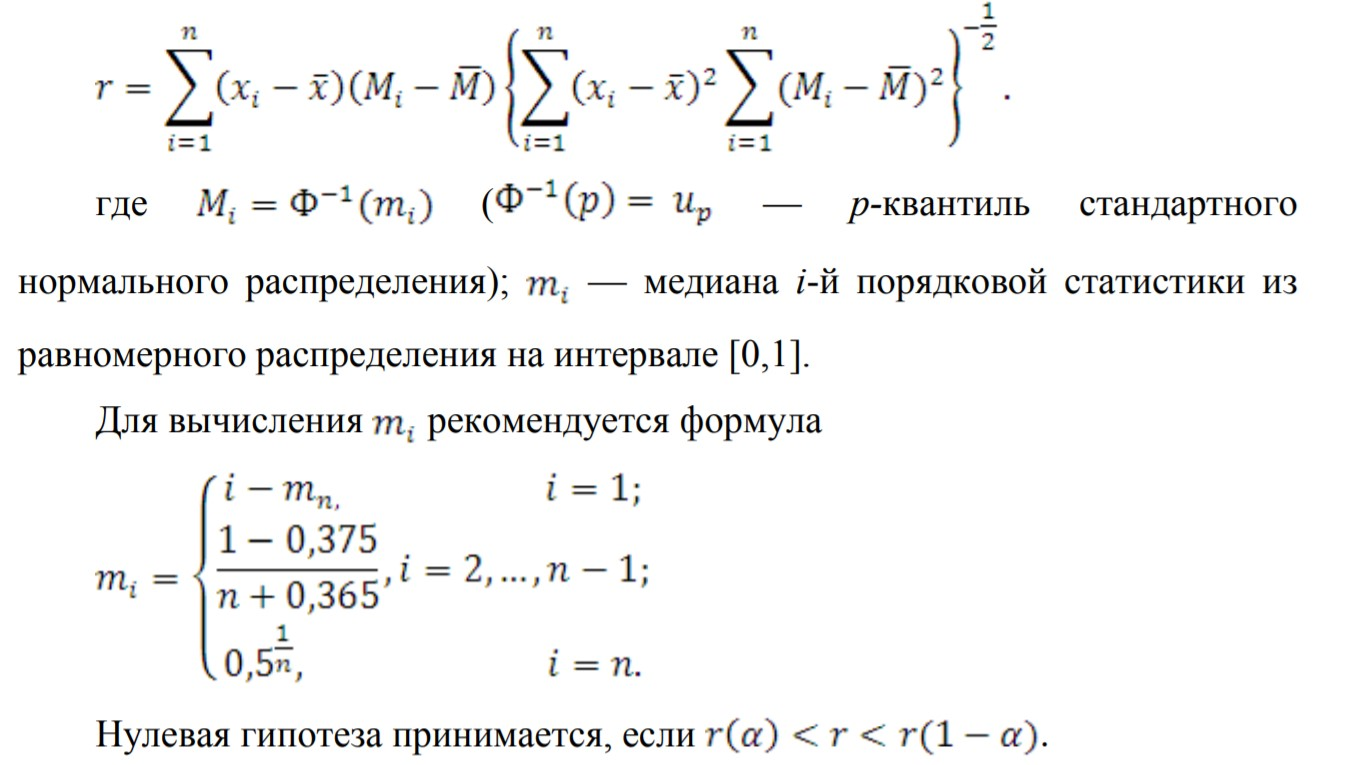

Загужаем библиотеки

In [243]:
import pandas as pd
import numpy as np

Определяем функцию, которая вычисляет медиану i-ой порядковой статистики из равномерного распределения на интервале [0, 1]

m

In [244]:
def small_m(n): # n - на вход принимает размер массива (выборки)
    m = []
    for i in range(n):   
        m.append(((i+1)-0.375)/(n+0.365))
    return m

Определяем функцию, находящую медианы порядковых статистик стандартного нормального распределения

M

In [252]:
def big_m(n): #на вход принимает размер массива (выборки)
    big_m = []
    m = small_m(n)
    for i in range(n):
        big_m.append(4.91*(m[i] ** 0.14 - (1 - m[i]) ** 0.14))
    return big_m

Находим коэффициент корреляции r между порядковыми статистиками эмпирического ряда наблюдений x_i и медианами порядковых статистик стандартного нормального распределения (M_i)

In [253]:
def r(x):
    n=len(x) #Размер массива
    r_val = 0
    r_part1 = 0
    r_part2 = 0
    r_part3 = 0
    M = big_m(n)
    x_mean = np.mean(x)
    M_mean = np.mean(M)
    for i in range(n):
        r_part1=r_part1 + ((x[i]-x_mean)*(M[i]-M_mean))
    for i in range(n):
        r_part2=r_part2 + ((x[i]-x_mean)**2)
    for i in range(n):
        r_part3=r_part3 + ((M[i]-M_mean)**2)
    
    r_val = r_part1 * (r_part2*r_part3)**(-0.5) #вычисляем по частям
    return r_val

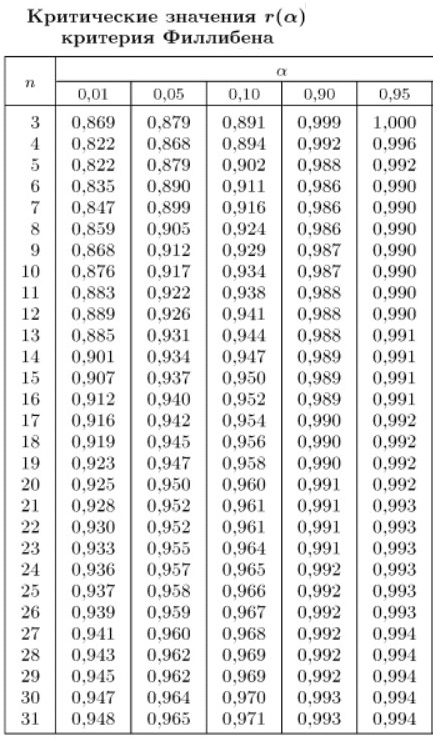

Альфа от 0,05 и 0,95 представляем в виде массива (по 20 элементов)

In [254]:
alpha05 = [0.879,0.868,0.879,0.89,0.899,0.905,0.912,0.917,0.922,0.926,0.931,0.934,0.937,0.940,0.942,0.945,0.947,0.95,0.952,0.952]
alpha95 = [1, 0.996, 0.992, 0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.991,0.991,0.991,0.991,0.992,0.992,0.992,0.992,0.933,0.993]
#a[i+4]

Определяем функцию, которая оценивается по критерию Филлибена

In [286]:
def filliben_criterion(x): #При Альфа = 0.05
    n = len(x)
    r_val = r(x)
    if alpha95[n-4] > r_val and r_val >=alpha05[n-4]:
        print('Нулевая гипотеза ПРИНИМАЕТСЯ')
        print((alpha95[n-4], r_val, alpha05[n-4]))
    else:
        print('Нулевая гипотеза ОТВЕРГАЕТСЯ')
        print((alpha95[n-4], r_val, alpha05[n-4]))


Тестируем на примере:

In [289]:
x = [-1, 0, 1, 2, 3, 5, 6, 7, 10, 15]

In [290]:
filliben_criterion(x)

Нулевая гипотеза ПРИНИМАЕТСЯ
(0.99, 0.9639068264175855, 0.912)


## Тесты на различных выборках:

In [296]:
x = [-1, 0, 1, 2, 3, 5, 6, 7, 10, 15]
filliben_criterion(x)

Нулевая гипотеза ПРИНИМАЕТСЯ
(0.99, 0.9639068264175855, 0.912)


Импортируем пакет random для генерации случайных данных

In [358]:
import random
x = np.array([round(random.random()*100-40) for i in range(10)])

In [359]:
x

array([ -7,  58, -21, -38, -36, -17, -12, -33, -39,  50])

In [360]:
filliben_criterion(x)

Нулевая гипотеза ОТВЕРГАЕТСЯ
(0.99, -0.024579614972764164, 0.912)


In [361]:
x = [-10, 0, 2, 3, 5, 6, 7, 10, 15]

In [362]:
filliben_criterion(x)

Нулевая гипотеза ПРИНИМАЕТСЯ
(0.99, 0.967213203204682, 0.905)
